# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=1500, noise=0.1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([1500, 2])

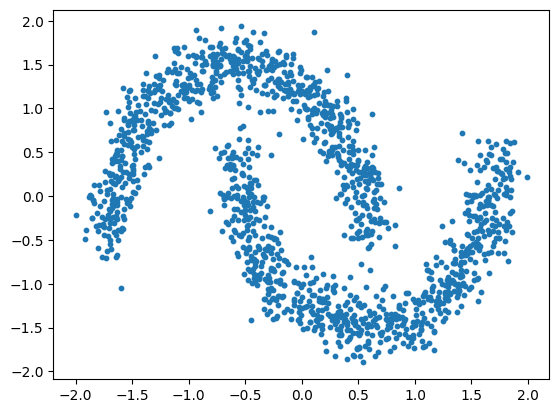

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [4]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 50,
    'sig': 3,
    'batch_size': 256,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=20, grid_resolution=5, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 500 | Loss: 1.7020: 100%|██████████| 500/500 [15:40<00:00,  1.88s/it]
Calculating Distances: 100%|██████████| 1861/1861 [00:05<00:00, 346.36it/s]


Henze-Zirkler p-value:	0.9953875879681628


0.9953875879681628

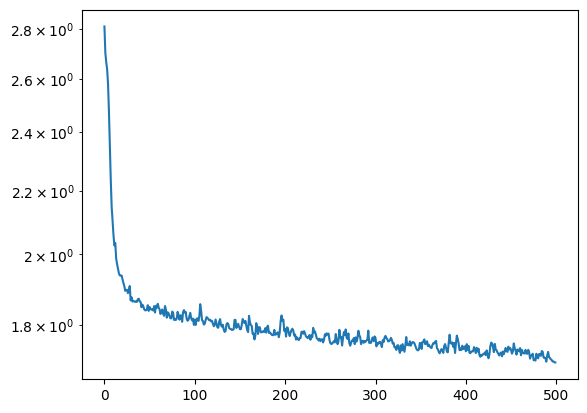

In [5]:
plt.plot(LAM.loss_history)
plt.yscale('log')

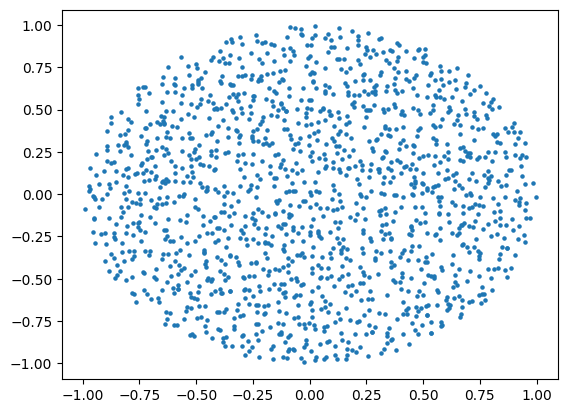

In [6]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [7]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0,  895,  898,   73,  886,  445,  141,  413, 1274,  885,  411,
         1100, 1378,  506,  518, 1316,  617, 1134,  123, 1482], dtype=int64)],
 [array([0.        , 0.00982145, 0.01996819, 0.03082769, 0.03099707,
         0.03470162, 0.03525665, 0.04249907, 0.04352136, 0.04570228,
         0.04635018, 0.04882415, 0.04958718, 0.04987746, 0.05014211,
         0.05740075, 0.0603094 , 0.06236194, 0.06315474, 0.06357775])])

In [8]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([  0, 895, 898,  73, 886], dtype=int64),
  array([  2, 233, 203, 358, 248], dtype=int64),
  array([   5,   21,  660,  900, 1397], dtype=int64)],
 [array([0.        , 0.00982145, 0.01996819, 0.03082769, 0.03099707]),
  array([0.        , 0.02258478, 0.02592264, 0.03764407, 0.03815398]),
  array([0.        , 0.02441597, 0.05554091, 0.07936152, 0.08796678])])

In [9]:
# calculate the distance between the points 0 and p
p = 5
dist = LAM.distance(0, p, return_path=False)
print(dist)

[1.46001518]


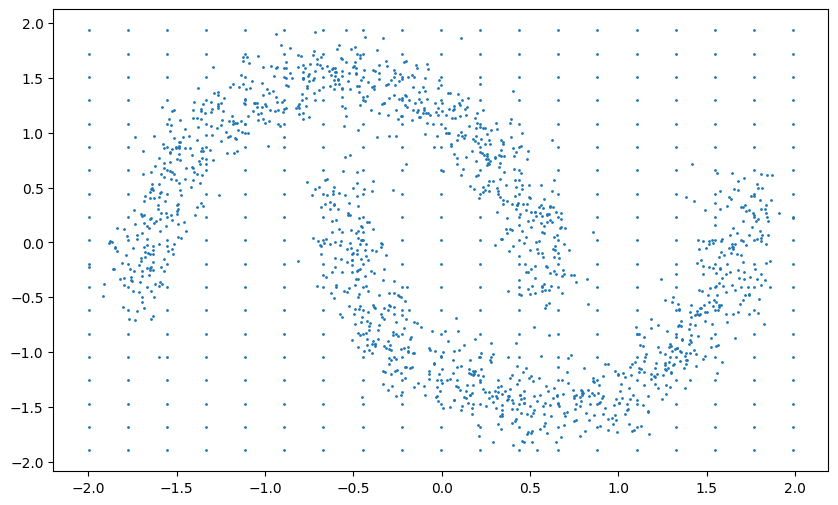

In [10]:
points = LAM.reference

# plot
fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(points[:, 0], points[:, 1], s=1)

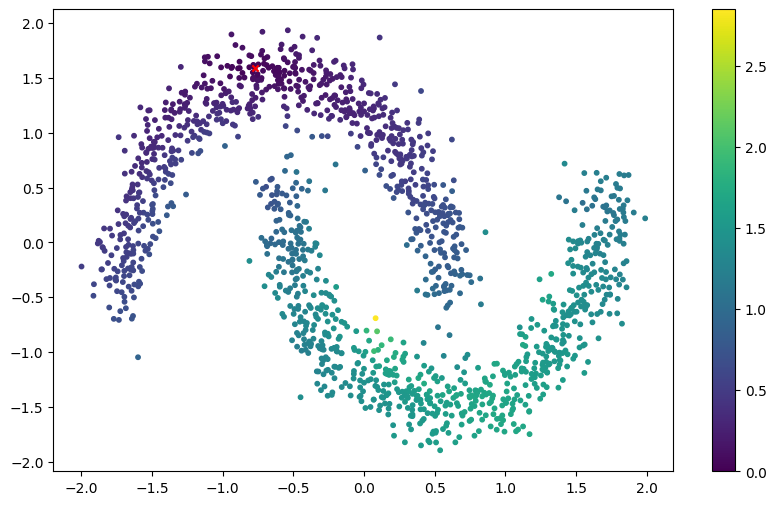

In [11]:
# calculate the distance to all points from the point 0 and plot

dist = LAM.distance(0)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[0, 0], X[0, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()

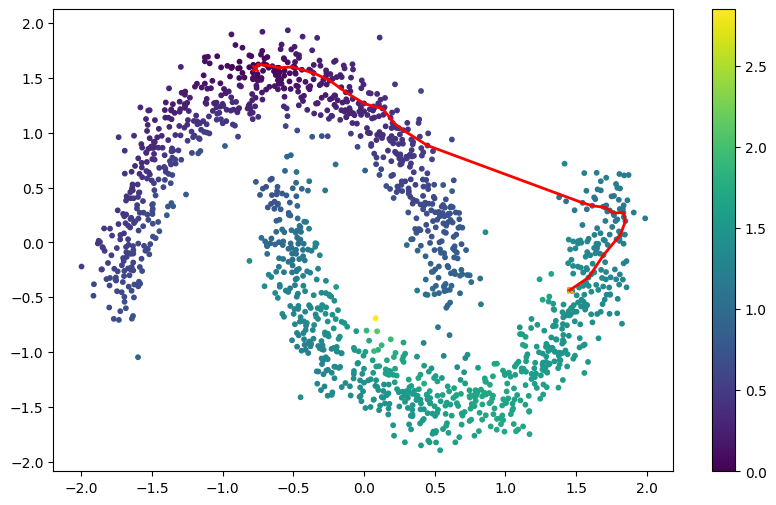

In [12]:
start_point = 0
end_point = p

_, path = LAM.distance(start_point, end_point, return_path=True)

fig, ax = plt.subplots(figsize=(10, 6))
plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
# plot the path, consider that the entries in path are points
ax.plot(path[:,0], path[:,1], c='r', linewidth=2)
ax.scatter(X[0, 0], X[0, 1], c='r', s=20, marker='x')
ax.scatter(X[p, 0], X[p, 1], c='orange', s=20, marker='x')
plt.colorbar(plot)
plt.show()

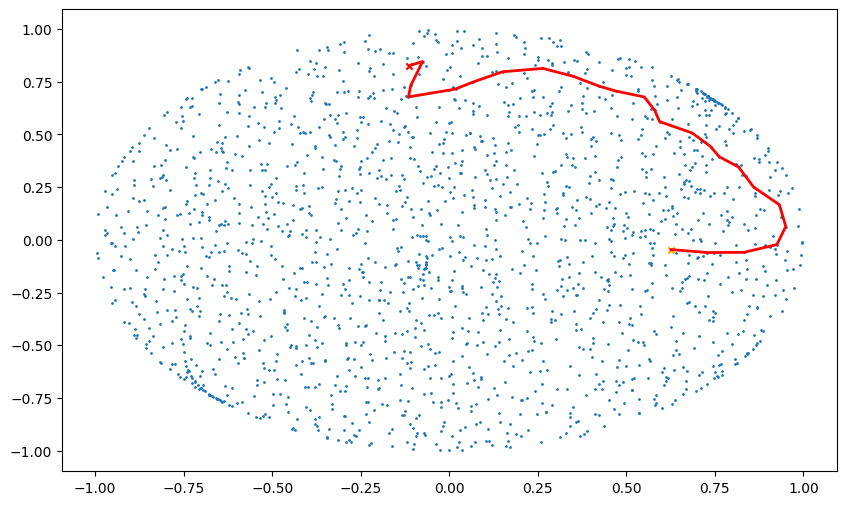

In [13]:
# plot pushed reference
fig, ax = plt.subplots(figsize=(10, 6))
plot = ax.scatter(LAM.reference_pushed[:, 0], LAM.reference_pushed[:, 1], s=1)

# plot the path

path = LAM.flow.transform(path)
ax.plot(path[:, 0], path[:, 1], c='r', linewidth=2)
ax.scatter(LAM.data_pushed[0, 0], LAM.data_pushed[0, 1], c='r', s=20, marker='x')
ax.scatter(LAM.data_pushed[p, 0], LAM.data_pushed[p, 1], c='orange', s=20, marker='x')

